In [463]:
out_dir = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/ccm_memory/results/notebook_03/train_memory_test_ad/conn/spearman/memory_dict'

# 01 - Begin Analysis

Enter the path to the dictionary generated by Notebook 01

In [464]:
dict_path = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/ccm_memory/results/notebook_01/train_memory_test_ad/memory_dict.json'

What correlation method would you like to use?
- Pearson is very fast, but depends on linearity and is sensitive to outliers
- Spearman is slower, but much more robust

In [465]:
correlation = 'spearman'

In [466]:
from calvin_utils.ccm_utils.npy_utils import DataLoader
from calvin_utils.ccm_utils.stat_utils import CorrelationCalculator
data_loader = DataLoader(dict_path)
correlation_calculator = CorrelationCalculator(method=correlation, verbose=False)
corr_map_dict = correlation_calculator.generate_correlation_maps(data_loader)

Evaluating ANT DBS SANTE
Evaluating STN DBS
Evaluating ANT DBS Maastricht
Evaluating Epilepsy iEEG
Evaluating Epilepsy Hypometabolism
Evaluating Acute Stroke
Evaluating Multiple Sclerosis
Evaluating Penetrating TBI
Evaluating Parietal TMS Hebscher
Evaluating Parietal TMS Wang
Evaluating Parietal TMS Hermiller 2019a
Evaluating Parietal TMS Hermiller 2019b


Identify Datasets that Belong to Different Categories. 

Groups (values) allocate datasets to a fixed effect analysis. If no groups, set group_dict = {}
```
{
'dataset_1': 'group1',
'dataset_2': 'group2',
'dataset_3': 'group1'
}
```

In [476]:
corr_map_dict.keys()

dict_keys(['ANT DBS SANTE', 'STN DBS', 'ANT DBS Maastricht', 'Epilepsy iEEG', 'Epilepsy Hypometabolism', 'Acute Stroke', 'Multiple Sclerosis', 'Penetrating TBI', 'Parietal TMS Hebscher', 'Parietal TMS Wang', 'Parietal TMS Hermiller 2019a', 'Parietal TMS Hermiller 2019b'])

Print out datasets

In [ ]:
group_dict = {
    'ANT DBS SANTE' : 'DBS',
    'STN DBS' : 'DBS',
    'ANT DBS Maastricht' : 'DBS',
    'Epilepsy iEEG' : 'DBS',
    'Epilepsy Hypometabolism' : 'Lesion',
    'Acute Stroke' : 'Lesion',
    'Multiple Sclerosis' : 'Lesion',
    'Penetrating TBI' : 'Lesion',
    'Parietal TMS Wang' : 'TMS',
    'Parietal TMS Hermiller 2019a' : 'TMS',
    'Parietal TMS Hermiller 2019b' : 'TMS',
    'Parietal TMS Hebscher' : 'TMS'
    }

# 02 - Use LOOCV to Train a Convergent Map on N-1 Datasets, Then Test it on the Nth dataset

Enter a list of datasets you want to flip (multiply correlation map by -1)
- This is typically done to control for sign inversion, enabling testing of topology specifically. 

In [469]:
datasets_to_flip = [] #'fornix_memory', 'adni_Alzheimer', 'corbetta_memory', 'grafmann_memory', 'manitoba_memory', 'ms_memory', 'kim_tms', 'hebscher_tms']

Generate the Convergent Maps and Save the Individual Correlation Maps

In [ ]:
from calvin_utils.ccm_utils.ccm_utils import LOOCVAnalyzer
loocv_analyzer = LOOCVAnalyzer(corr_map_dict, data_loader, 
                               similarity='spatial_correl',
                               optimizer=False,
                               method=correlation, n_bootstrap=1000, 
                               out_dir=out_dir,
                               weight=False,
                               mask_path='/Users/cu135/hires_backdrops/MNI/MNI152_T1_2mm_brain_mask.nii',
                               roi_path=None,
                               datasets_to_flip=datasets_to_flip,
                               align_all_maps=True
                               )

Removing NaNS from self.coor_map_dict.


Generate Agreement Maps

In [471]:
loocv_analyzer.generate_and_save_maps(group_dict=group_dict, dir='convergence_maps/', verbose=False)

Generate Group Level Maps

In [472]:
loocv_analyzer.save_individual_r_maps(dir='group_maps/', verbose=False)

Run LOOCV

Evaluating dataset: ANT DBS SANTE


<Figure size 288x288 with 0 Axes>

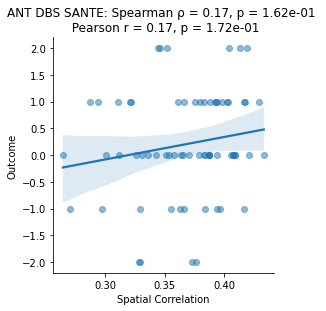

Running bootstraps: 100%|██████████| 1000/1000 [00:00<00:00, 5974.03it/s]


Evaluating dataset: STN DBS


<Figure size 432x288 with 0 Axes>

<Figure size 288x288 with 0 Axes>

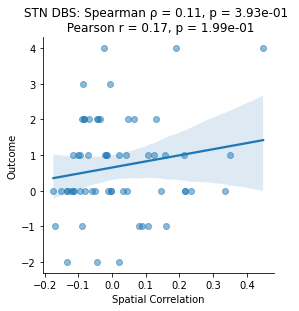

Running bootstraps: 100%|██████████| 1000/1000 [00:00<00:00, 6252.15it/s]


Evaluating dataset: ANT DBS Maastricht


<Figure size 432x288 with 0 Axes>

<Figure size 288x288 with 0 Axes>

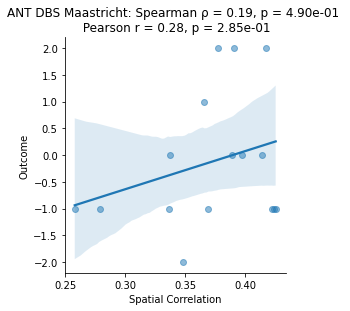

Running bootstraps: 100%|██████████| 1000/1000 [00:00<00:00, 6226.15it/s]


Evaluating dataset: Epilepsy iEEG


<Figure size 432x288 with 0 Axes>

<Figure size 288x288 with 0 Axes>

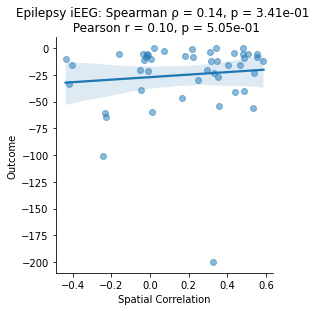

Running bootstraps: 100%|██████████| 1000/1000 [00:00<00:00, 5411.75it/s]


Evaluating dataset: Epilepsy Hypometabolism


<Figure size 432x288 with 0 Axes>

<Figure size 288x288 with 0 Axes>

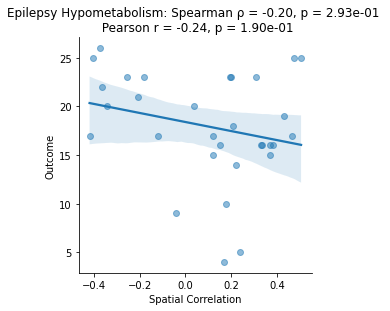

Running bootstraps: 100%|██████████| 1000/1000 [00:00<00:00, 6491.27it/s]


Evaluating dataset: Acute Stroke


<Figure size 432x288 with 0 Axes>

<Figure size 288x288 with 0 Axes>

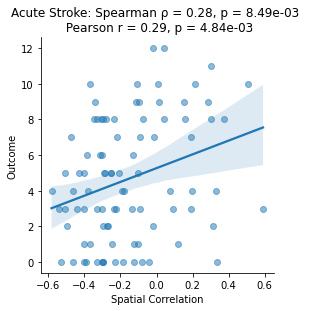

Running bootstraps: 100%|██████████| 1000/1000 [00:00<00:00, 6000.53it/s]


Evaluating dataset: Multiple Sclerosis


<Figure size 432x288 with 0 Axes>

<Figure size 288x288 with 0 Axes>

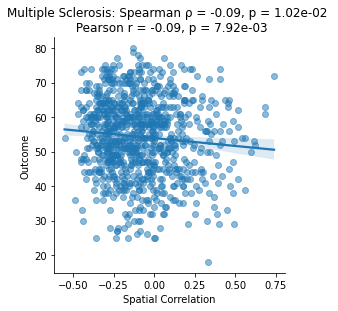

Running bootstraps: 100%|██████████| 1000/1000 [00:00<00:00, 3170.54it/s]


Evaluating dataset: Penetrating TBI


<Figure size 432x288 with 0 Axes>

<Figure size 288x288 with 0 Axes>

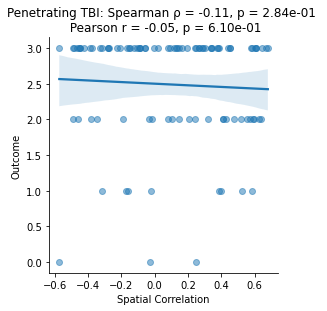

Running bootstraps: 100%|██████████| 1000/1000 [00:00<00:00, 6124.60it/s]


Evaluating dataset: Parietal TMS Hebscher


<Figure size 432x288 with 0 Axes>

<Figure size 288x288 with 0 Axes>

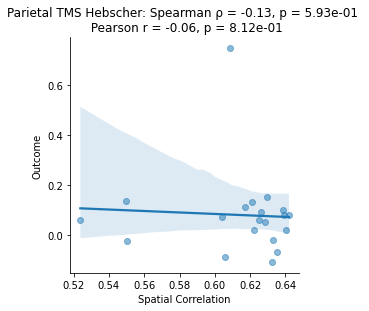

Running bootstraps: 100%|██████████| 1000/1000 [00:00<00:00, 6274.51it/s]


Evaluating dataset: Parietal TMS Wang


<Figure size 432x288 with 0 Axes>

<Figure size 288x288 with 0 Axes>

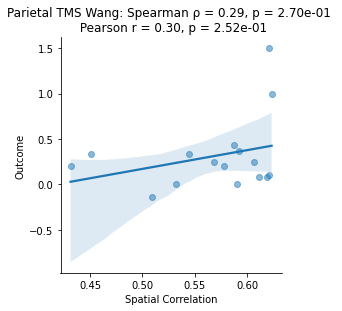

Running bootstraps: 100%|██████████| 1000/1000 [00:00<00:00, 5468.94it/s]


Evaluating dataset: Parietal TMS Hermiller 2019a


<Figure size 432x288 with 0 Axes>

<Figure size 288x288 with 0 Axes>

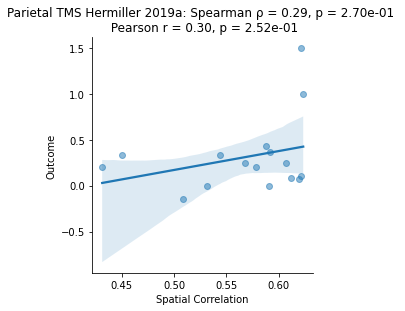

Running bootstraps: 100%|██████████| 1000/1000 [00:00<00:00, 6519.88it/s]


Evaluating dataset: Parietal TMS Hermiller 2019b


<Figure size 432x288 with 0 Axes>

<Figure size 288x288 with 0 Axes>

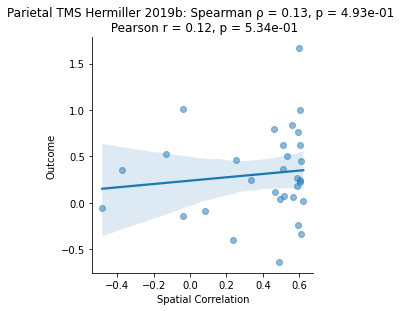

Running bootstraps: 100%|██████████| 1000/1000 [00:00<00:00, 6508.75it/s]


,Dataset,CI Lower,CI Upper,Mean R
0,ANT DBS SANTE,-0.066550,0.397398,0.171609
1,STN DBS,-0.138621,0.364437,0.113385
2,ANT DBS Maastricht,-0.340540,0.663846,0.186321
3,Epilepsy iEEG,-0.137597,0.405977,0.141981
4,Epilepsy Hypometabolism,-0.203926,0.562476,0.195259
5,Acute Stroke,0.077240,0.456183,0.275882
6,Multiple Sclerosis,0.020061,0.155622,0.087459
7,Penetrating TBI,-0.080035,0.324292,0.110364
8,Parietal TMS Hebscher,-0.347382,0.547246,0.127211
9,Parietal TMS Wang,-0.313976,0.729420,0.293512


<Figure size 432x288 with 0 Axes>

In [473]:
loocv_analyzer.run()
display(loocv_analyzer.results_df)

# 03 - Compute Fixed Effects

Run It

In [474]:
import pandas as pd
df = loocv_analyzer.compute_fixed_effects_by_group(group_dict)
meta_df = pd.concat([loocv_analyzer.results_df, df], ignore_index=True)
meta_df

,Dataset,CI Lower,CI Upper,Mean R
0,ANT DBS SANTE,-0.066550,0.397398,0.171609
1,STN DBS,-0.138621,0.364437,0.113385
2,ANT DBS Maastricht,-0.340540,0.663846,0.186321
3,Epilepsy iEEG,-0.137597,0.405977,0.141981
4,Epilepsy Hypometabolism,-0.203926,0.562476,0.195259
5,Acute Stroke,0.077240,0.456183,0.275882
6,Multiple Sclerosis,0.020061,0.155622,0.087459
7,Penetrating TBI,-0.080035,0.324292,0.110364
8,Parietal TMS Hebscher,-0.347382,0.547246,0.127211
9,Parietal TMS Wang,-0.313976,0.729420,0.293512


# 04 - Visualize Your Meta Analysis as a Forest Plot Figure 
- This is a meta-analysis. It presents the effect size (R/rho values) of your convergent map on the left-out map. 

Generate a Forest Plot of the Results

Saved plot as meta_convergence_forest_plot.png and meta_convergence_forest_plot.svg in /Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/ccm_memory/results/notebook_03/train_memory_test_ad/conn/spearman/memory_dict/forest_plots


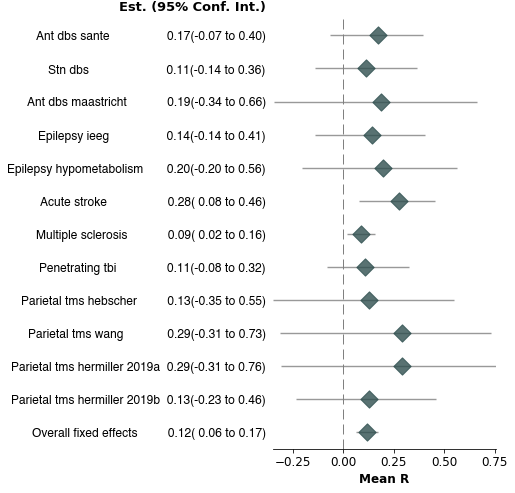

In [475]:
from calvin_utils.ccm_utils.stat_utils import MetaConvergenceForestPlot
meta_forest_plot = MetaConvergenceForestPlot(meta_df, sig_digits=2, out_dir=out_dir, table=True)
meta_forest_plot.run()

That's all

-Calvin